# PREPROCESSING

## Load data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from scipy.stats import norm
import random as rand
import pickle

# Environment settings
data_path = 'Data/'
    
# Deserialize previously saved data from "data-visualization"
dataframes = {}
for df_name in ['test', 'train']:
    with open(data_path+df_name+'_dv.obj', 'rb') as file:
        dataframes[df_name] = pickle.load(file)

## Preprocess

In [2]:
# Remove columns & missing value rows
for df_name, df in dataframes.items():
    dataframes[df_name] = dataframes[df_name].drop(['Ticket','Cabin'], axis=1)

In [3]:
# Transform category data into numerical
# hack for seaborn heatmap (no support for categorical values)
for df_name, df in dataframes.items():
    df['Sex'] = [0 if x == 'male' else 1 for x in df['Sex']]
    
#One hot encoding for Embark
for df_name, df in dataframes.items():
    f_df = pd.get_dummies(dataframes[df_name][['Embarked']],drop_first=True)
    dataframes[df_name].drop(['Embarked'],axis=1,inplace=True)
    dataframes[df_name] = pd.concat([dataframes[df_name],f_df],axis=1)

Number of missing 'Age' points is in training set 0
Number of missing 'Age' points is in test set 0


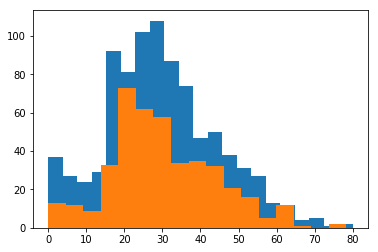

In [4]:
# Replace Age missing values with data generated from gaussian
np.random.seed(666)
for df_name, df in dataframes.items():
    # create gaussian with available da
    nan_filter = df['Age'].isna()
    mu, sigma = norm.fit(df[-nan_filter]['Age'])
    norm_dist = np.random.normal(mu, sigma, nan_filter.sum())
    df.loc[nan_filter,'Age'] = norm_dist
    
    # set to zero all ages below zero
    df.loc[df.Age<0, 'Age'] = 0

# Plot histogram of the gaussian distribution of the age
plt.hist(dataframes['train']['Age'], bins='auto')
plt.hist(dataframes['test']['Age'], bins='auto')
print("Number of missing 'Age' points is in training set {}".format(dataframes['train']['Age'].isna().sum()))
print("Number of missing 'Age' points is in test set {}".format(dataframes['test']['Age'].isna().sum()))

Series([], Name: Pclass, dtype: category
Categories (3, object): [1, 2, 3])
Number of missing 'Fare' points is in test set 0


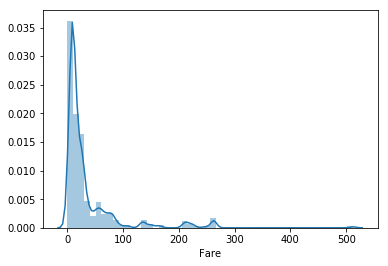

In [9]:
# Replace Fare missing values in test set with data generated from gaussian
sns.distplot(dataframes['test']['Fare'][~np.isnan(dataframes['test']['Fare'])]);

#Group fare by class
grouped=dataframes['test'].groupby('Pclass').mean()
grouped_fare =grouped['Fare']
#Get row (1 row in this case) that has missing value
nan_filter = dataframes['test']['Fare'].isna()
print(dataframes['test'].loc[nan_filter,'Pclass'])
#Since the missing value comes from a third class passenger, replace missing value
#with mean of third class fares
dataframes['test'].loc[nan_filter,'Fare'] = grouped_fare[2]
print("Number of missing 'Fare' points is in test set {}".format(dataframes['test']['Fare'].isna().sum()))

## Save data

In [10]:
# Serialize dataframes for later use in implementations
for df_name, df in dataframes.items():
    with open(data_path+df_name+'_pp.obj', 'wb') as file:
        pickle.dump(df, file)